In [50]:
import numpy as np
import pandas as pd
import torch
from rdkit import Chem
from rdkit.Chem import PandasTools

# SMILES to molecular structure

In [2]:
smiles = pd.read_csv('../checkpoints/ZINC_vae_done/vae_generated.csv')
smiles.head()

,SMILES
0,CCN(Cc1ccc2c(c1)OCO2)C(=O)c1cccs1
1,COCc1ccccc1CNS(=O)(=O)c1ccc(F)cc1
2,OC(CNc1cnc2cc(F)ccc2n1)c1ccccc1Cl
3,CC1CCC(C(N)=O)CN1C(=O)CCSc1ccccc1
4,CCc1noc(C(C)N2CCN(c3ccc4nncn4n3)C(C)C2)n1


In [3]:
smiles['ROMol'] = smiles['SMILES'].apply(Chem.MolFromSmiles)

[09:51:41] SMILES Parse Error: unclosed ring for input: 'Cn1c(=O)c2c3c(sc2n2cnnc11)CC(C)(C)O3'
[09:51:41] SMILES Parse Error: extra open parentheses for input: 'NC(=O)C1CCN(C(=O)COc2ccc(Cl)cc2Cl)C(C1C2CC1'
[09:51:41] SMILES Parse Error: unclosed ring for input: 'COc1ccc(-c2nnc3c4cnn(-c5ccc(C)cc4)c3nc2=O)cc1'
[09:51:41] Can't kekulize mol.  Unkekulized atoms: 2 15 22
[09:51:41] SMILES Parse Error: unclosed ring for input: 'CCCCOC(=O)C1C2CCCCN1C(=O)c2ccccc12'
[09:51:41] SMILES Parse Error: unclosed ring for input: 'O=c1c(NCc2ccccc2Br)cnn2ccnc11'
[09:51:41] SMILES Parse Error: unclosed ring for input: 'CCOC(=O)CCCn1nc(C)c2c1C=CCCC21O'
[09:51:41] Can't kekulize mol.  Unkekulized atoms: 9 10 11 12 15 17
[09:51:41] Can't kekulize mol.  Unkekulized atoms: 10 11 12 13 16
[09:51:41] SMILES Parse Error: unclosed ring for input: 'Cc1ccc(C)n1-c1sc1c(cc1Cl)NC(=O)C2C'
[09:51:41] SMILES Parse Error: unclosed ring for input: 'O=c1c(=Cc2ccncc2)sc2n1CN=c2cnn(C3CCCC3)c12'
[09:51:41] Can't kekulize mol.  

In [4]:
smiles.head()

,SMILES,ROMol
0,CCN(Cc1ccc2c(c1)OCO2)C(=O)c1cccs1,<rdkit.Chem.rdchem.Mol object at 0x0000019A751...
1,COCc1ccccc1CNS(=O)(=O)c1ccc(F)cc1,<rdkit.Chem.rdchem.Mol object at 0x0000019A751...
2,OC(CNc1cnc2cc(F)ccc2n1)c1ccccc1Cl,<rdkit.Chem.rdchem.Mol object at 0x0000019A751...
3,CC1CCC(C(N)=O)CN1C(=O)CCSc1ccccc1,<rdkit.Chem.rdchem.Mol object at 0x0000019A751...
4,CCc1noc(C(C)N2CCN(c3ccc4nncn4n3)C(C)C2)n1,<rdkit.Chem.rdchem.Mol object at 0x0000019A751...


c:\Users\ai-ws\anaconda3\envs\moses\lib\site-packages\rdkit\Chem\Draw\IPythonConsole.py:261: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


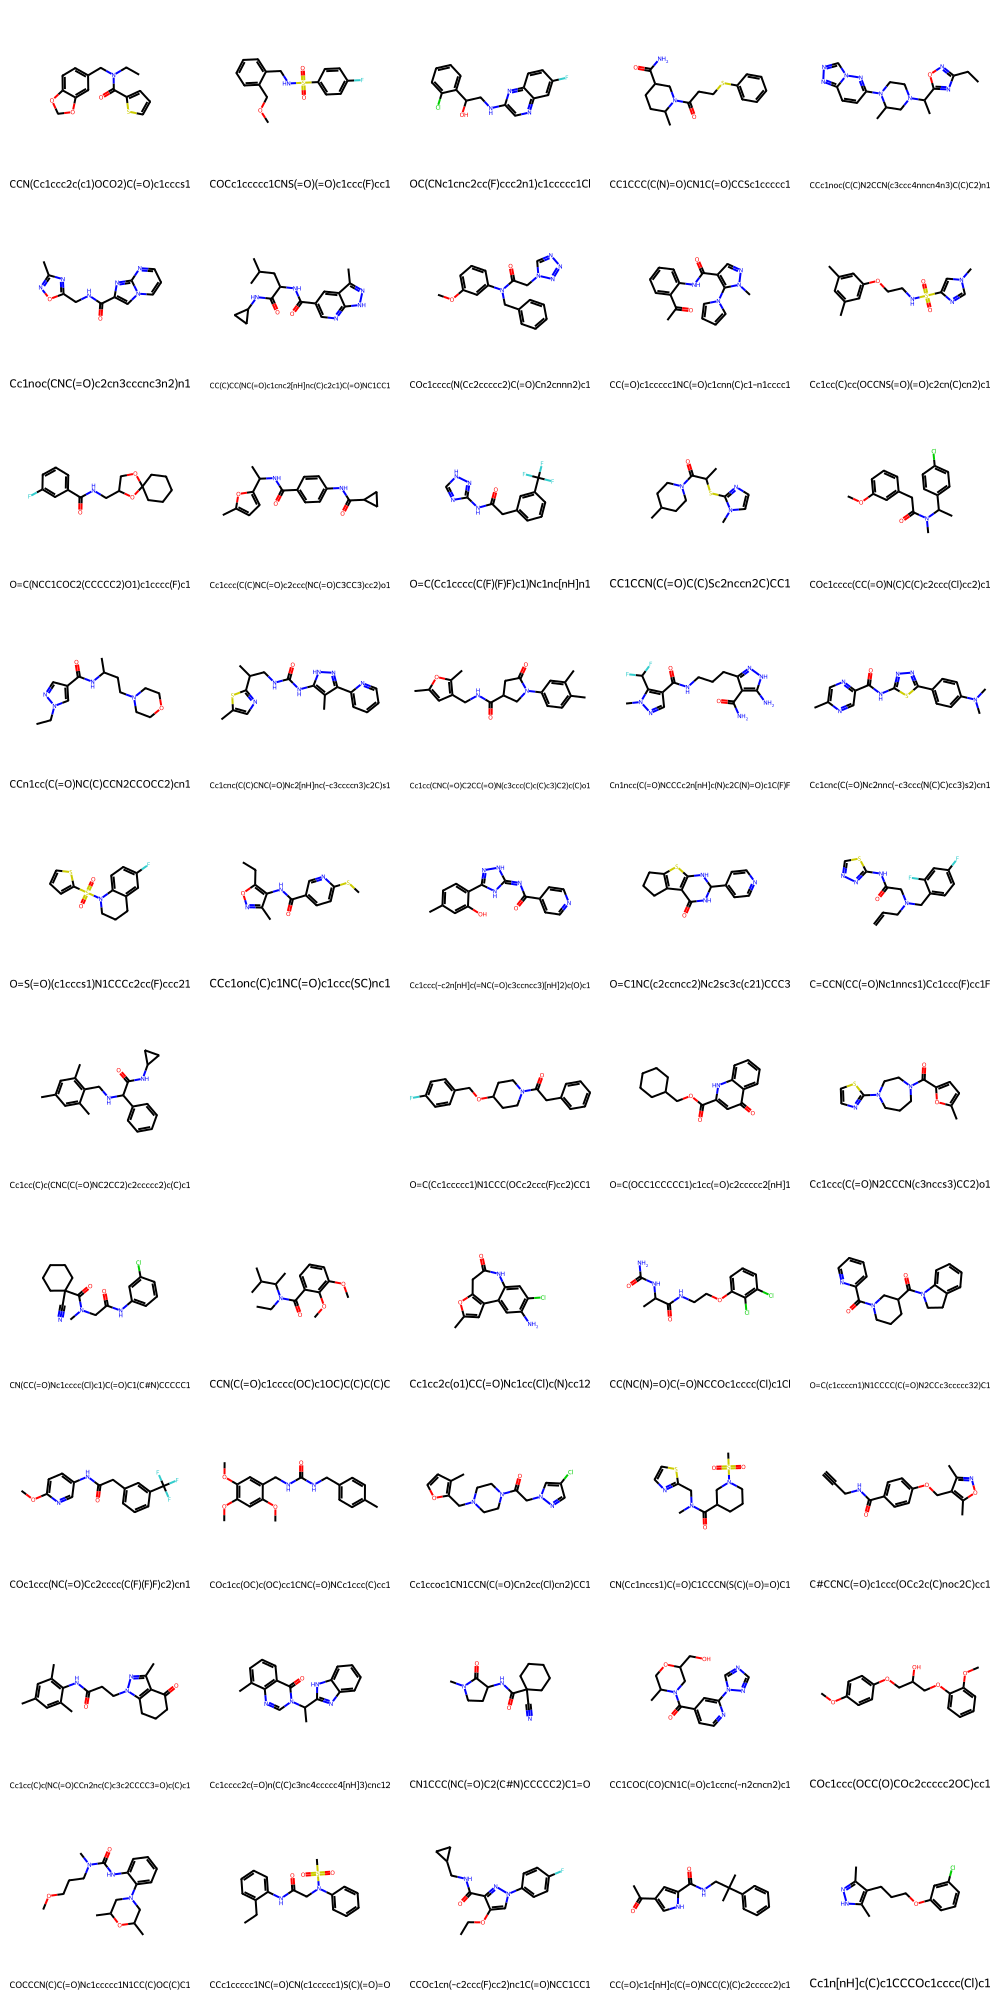

In [5]:
display(PandasTools.FrameToGridImage(smiles, column='ROMol', legendsCol='SMILES', molsPerRow=5))

In [6]:
smiles

,SMILES,ROMol
0,CCN(Cc1ccc2c(c1)OCO2)C(=O)c1cccs1,<rdkit.Chem.rdchem.Mol object at 0x0000019A751...
1,COCc1ccccc1CNS(=O)(=O)c1ccc(F)cc1,<rdkit.Chem.rdchem.Mol object at 0x0000019A751...
2,OC(CNc1cnc2cc(F)ccc2n1)c1ccccc1Cl,<rdkit.Chem.rdchem.Mol object at 0x0000019A751...
3,CC1CCC(C(N)=O)CN1C(=O)CCSc1ccccc1,<rdkit.Chem.rdchem.Mol object at 0x0000019A751...
4,CCc1noc(C(C)N2CCN(c3ccc4nncn4n3)C(C)C2)n1,<rdkit.Chem.rdchem.Mol object at 0x0000019A751...
...,...,...
9995,O=C(Nc1ccc(Nc2ncccn2)cc1)c1cccs1,<rdkit.Chem.rdchem.Mol object at 0x0000019A7CF...
9996,O=C(CCn1cncn1)Nc1cc(SCc2ccccc2)ncn1,<rdkit.Chem.rdchem.Mol object at 0x0000019A7CF...
9997,CCOc1ccc(C(=O)N(C)C)cc1NC(=O)c1ccc(F)c(F)c1,<rdkit.Chem.rdchem.Mol object at 0x0000019A7CF...
9998,CC(C)C(=O)N1CCCN(C(=O)c2c(F)cccc2Cl)CC1,<rdkit.Chem.rdchem.Mol object at 0x0000019A7CF...


# Latent Space Visualization

## VAE model on ZINC dataset

In [115]:
import sys
sys.path.append("..")
import moses
from moses.vae import VAE
from moses.utils import CharVocab, StringDataset
from moses.vae.trainer import VAETrainer

from moses.metrics import QED
from moses.utils import get_mol

In [16]:
config = torch.load('../checkpoints/ZINC_vae_done/vae_config.pt')
# vocab = torch.load('../checkpoints/ZINC_vae_done/vae_vocab.pt')

train = moses.get_dataset('train', config)
vocab = CharVocab.from_data(train)
vocab.vectors = torch.eye(len(vocab.c2i))

{'l', ']', 'O', '#', 'n', 'N', 'c', 'S', '1', '2', '-', '4', 'H', 'r', 's', '[', 'F', 'B', '(', ')', '=', 'C', 'o', '6', '5', '3'}


In [24]:
model_path = '../checkpoints/ZINC_vae_done/vae_model_080.pt'
model = VAE(vocab, config)
model.load_state_dict(torch.load(model_path))

<All keys matched successfully>

* sample size = 50,000

In [152]:
size = 50000
np.random.seed(0)
rand_indices = np.random.choice(train.shape[0], size, replace=False)
sample = train[rand_indices]

In [153]:
sample_mol = list(map(get_mol, sample))
sample_qed = list(map(QED, sample_mol))

In [107]:
trainer = VAETrainer(config)
sample_loader = trainer.get_dataloader(model, sample, shuffle=False)

In [108]:
Z = []

for step, batch in enumerate(sample_loader):
    input_batch = tuple(data.to(model.device) for data in batch)
    z, _ = model.forward_encoder(input_batch)
    Z.extend(z.detach().cpu().numpy())
    
Z = np.array(Z)

### 1. PCA of latent space

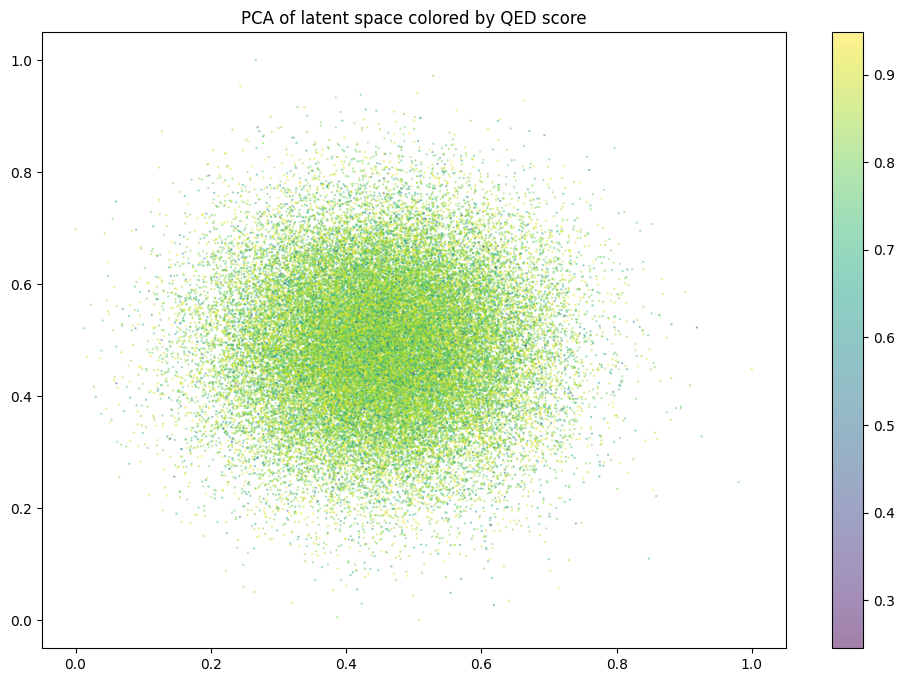

In [140]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


# do pca and normalize
Z_pca = PCA(n_components=2).fit_transform(Z)
Z_pca = MinMaxScaler().fit_transform(Z_pca)

df = pd.DataFrame(np.transpose((Z_pca[:,0],Z_pca[:,1])))
df.columns = ['x','y']
df['qed']=sample_qed

plt.figure(figsize=(12,8))
plt.scatter(x=df['x'], y=df['y'], c=df['qed'],
            cmap= 'viridis', marker='.',
            s=10,alpha=0.5, edgecolors='none')
plt.colorbar()
plt.title('PCA of latent space colored by QED score')
plt.show()

### 2. T-SNE of latent space

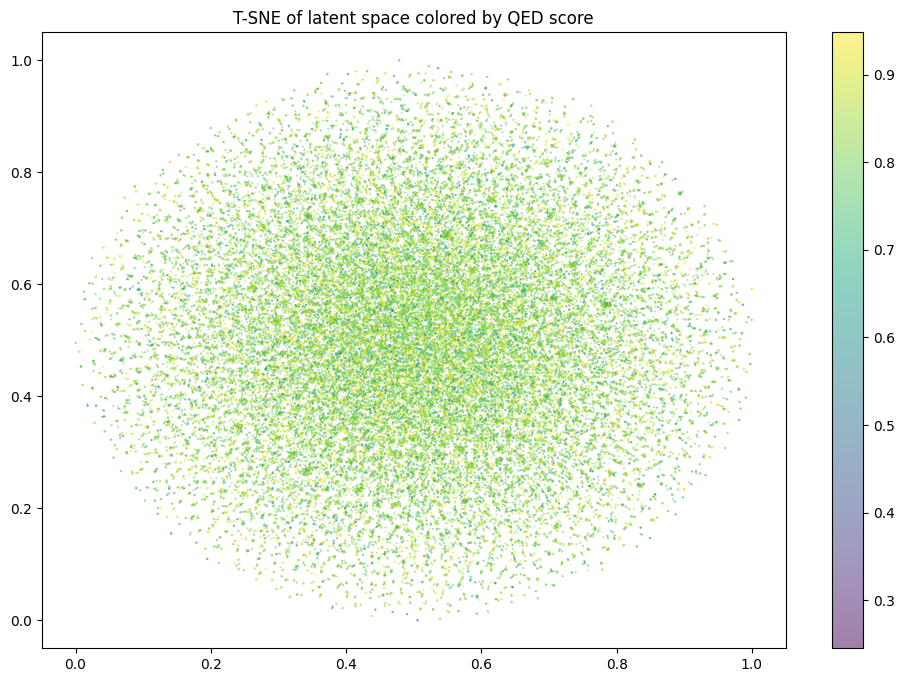

In [139]:
from sklearn.manifold import TSNE


Z_tsne = TSNE(n_components=2).fit_transform(Z)
Z_tsne = MinMaxScaler().fit_transform(Z_tsne)

df = pd.DataFrame(np.transpose((Z_tsne[:,0],Z_tsne[:,1])))
df.columns = ['x','y']
df['qed']=sample_qed

plt.figure(figsize=(12,8))
plt.scatter(x=df['x'], y=df['y'], c=df['qed'],
            cmap= 'viridis', marker='.',
            s=10,alpha=0.5, edgecolors='none')
plt.colorbar()
plt.title('T-SNE of latent space colored by QED score')
plt.show()

## VAE model on QM9 dataset

In [155]:
config = torch.load('../checkpoints/QM9_vae_done/vae_config.pt')
# vocab = torch.load('../checkpoints/QM9_vae_done/vae_vocab.pt')

train = moses.get_dataset('train', config)
vocab = CharVocab.from_data(train)
vocab.vectors = torch.eye(len(vocab.c2i))

{']', '#', 'O', 'n', 'N', 'c', '1', '2', '4', '-', 'H', '[', 'F', '(', ')', '=', 'C', 'o', '5', '3'}


In [156]:
model_path = '../checkpoints/QM9_vae_done/vae_model_080.pt'
model = VAE(vocab, config)
model.load_state_dict(torch.load(model_path))

<All keys matched successfully>

* sample size = 50,000

In [157]:
size = 50000
np.random.seed(0)
rand_indices = np.random.choice(train.shape[0], size, replace=False)
sample = train[rand_indices]

In [160]:
sample_mol = list(map(get_mol, sample))
sample_qed = list(map(QED, sample_mol))

In [161]:
trainer = VAETrainer(config)
sample_loader = trainer.get_dataloader(model, sample, shuffle=False)

In [162]:
Z = []

for step, batch in enumerate(sample_loader):
    input_batch = tuple(data.to(model.device) for data in batch)
    z, _ = model.forward_encoder(input_batch)
    Z.extend(z.detach().cpu().numpy())
    
Z = np.array(Z)

### 1. PCA of latent space

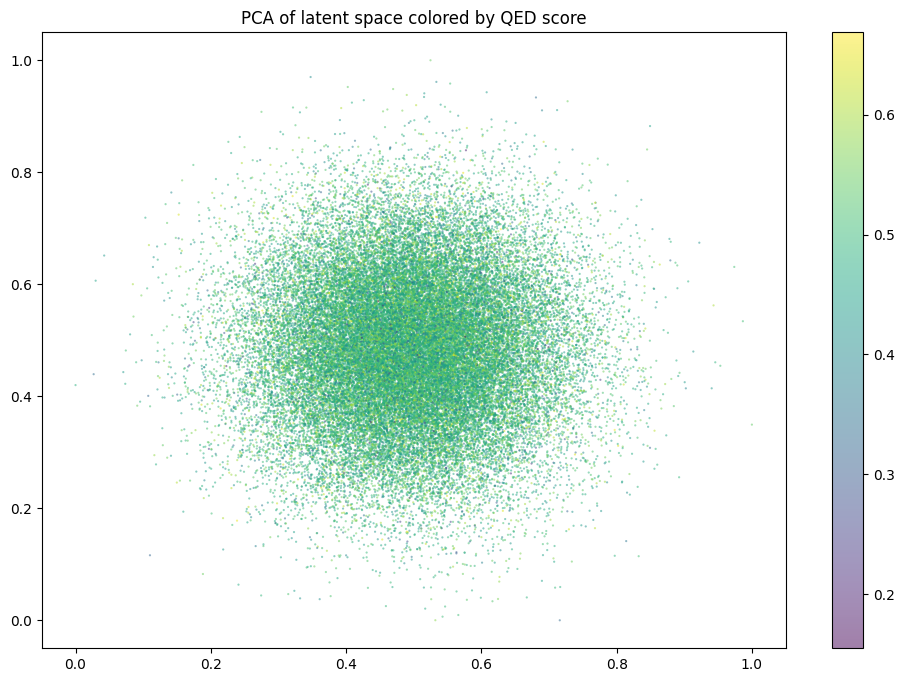

In [163]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


# do pca and normalize
Z_pca = PCA(n_components=2).fit_transform(Z)
Z_pca = MinMaxScaler().fit_transform(Z_pca)

df = pd.DataFrame(np.transpose((Z_pca[:,0],Z_pca[:,1])))
df.columns = ['x','y']
df['qed']=sample_qed

plt.figure(figsize=(12,8))
plt.scatter(x=df['x'], y=df['y'], c=df['qed'],
            cmap= 'viridis', marker='.',
            s=10,alpha=0.5, edgecolors='none')
plt.colorbar()
plt.title('PCA of latent space colored by QED score')
plt.show()

### 2. T-SNE of latent space

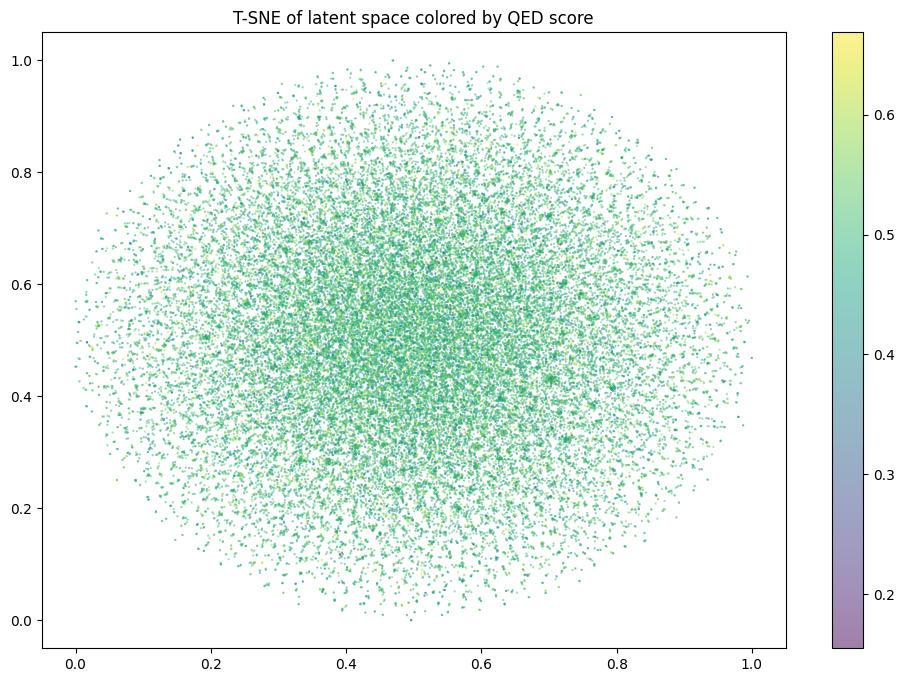

In [164]:
from sklearn.manifold import TSNE


Z_tsne = TSNE(n_components=2).fit_transform(Z)
Z_tsne = MinMaxScaler().fit_transform(Z_tsne)

df = pd.DataFrame(np.transpose((Z_tsne[:,0],Z_tsne[:,1])))
df.columns = ['x','y']
df['qed']=sample_qed

plt.figure(figsize=(12,8))
plt.scatter(x=df['x'], y=df['y'], c=df['qed'],
            cmap= 'viridis', marker='.',
            s=10,alpha=0.5, edgecolors='none')
plt.colorbar()
plt.title('T-SNE of latent space colored by QED score')
plt.show()

# print molecule structure

In [26]:
gen_molecule = pd.read_csv('../../vae_qm9_generated.csv')
gen_molecule.head

<bound method NDFrame.head of                    SMILES
0      N#CC1C(=O)NC(=O)C1
1         COC1C(O)C12CC2O
2             CCC1CC1OCCO
3           COCc1cn(O)nn1
4       CCc1c[nH]c(=O)c1C
...                   ...
29995     OC1CC2(CC2)C1CO
29996      N#CC(N)C(O)CCO
29997  N#CC12CC3(CN1)CC23
29998      CC(=O)Nc1ncno1
29999      CC1C(C#N)CC1CO

[30000 rows x 1 columns]>